# 2A.ML101.6: Unsupervised Learning: Dimensionality Reduction and Visualization

Unsupervised learning is interested in situations in which X is available, but not y: data without labels. A typical use case is to find hiden structure in the data.

*Source:* [Course on machine learning with scikit-learn](https://github.com/GaelVaroquaux/sklearn_ensae_course) by Gaël Varoquaux

## Dimensionality Reduction: PCA

Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We'll perform PCA on the iris dataset that we saw before:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

PCA is performed using linear combinations of the original features
using a truncated Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [3]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Other attributes are available as well:

In [4]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [5]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

Let us project the iris dataset along those first two dimensions:

In [6]:
X_pca = pca.transform(X)

PCA `normalizes` and `whitens` the data, which means that the data
is now centered on both components with unit variance:

In [7]:
X_pca.mean(axis=0)

array([ -1.30044124e-15,  -1.69790108e-15])

In [8]:
X_pca.std(axis=0)

array([ 0.99666109,  0.99666109])

Furthermore, the samples components do no longer carry any linear correlation:

In [9]:
import numpy as np
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,   6.51918477e-16],
       [  6.51918477e-16,   1.00000000e+00]])

We can visualize the projection using pylab

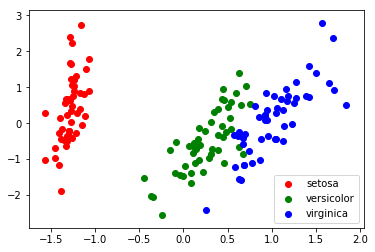

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

target_ids = range(len(iris.target_names))
plt.figure()
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
plt.legend()

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is **unsupervised**.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.

Note also that the default implementation of PCA computes the
singular value decomposition (SVD) of the full
data matrix, which is not scalable when both ``n_samples`` and
``n_features`` are big (more that a few thousands).
If you are interested in a number of components that is much
smaller than both ``n_samples`` and ``n_features``, consider using
`sklearn.decomposition.RandomizedPCA` instead.

## Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  A set
of algorithms known as *Manifold Learning* have been developed to address
this deficiency.  A canonical dataset used in Manifold learning is the
*S-curve*, which we briefly saw in an earlier section:

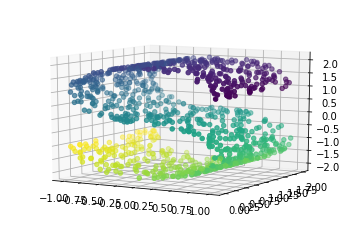

In [11]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60)

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

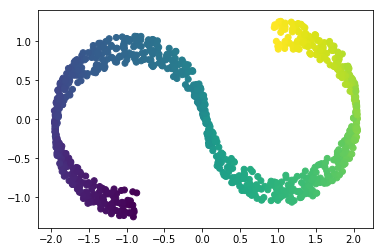

In [12]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

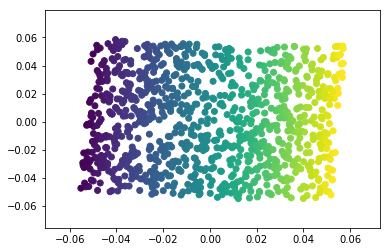

In [13]:
from sklearn.manifold import LocallyLinearEmbedding, Isomap
lle = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='modified')
X_lle = lle.fit_transform(X)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)

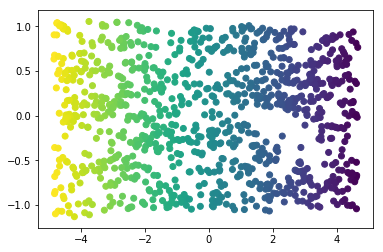

In [14]:
iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y)

## Exercise: Dimension reduction of digits

Apply PCA, LocallyLinearEmbedding, and Isomap to project the data to two dimensions.
Which visualization technique separates the classes most cleanly?

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
# ...

### Solution:

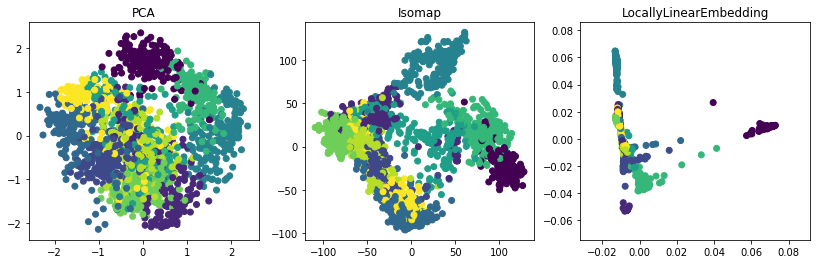

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding

plt.figure(figsize=(14, 4))
for i, est in enumerate([PCA(n_components=2, whiten=True),
                         Isomap(n_components=2, n_neighbors=10),
                         LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='modified')]):
    plt.subplot(131 + i)
    projection = est.fit_transform(digits.data)
    plt.scatter(projection[:, 0], projection[:, 1], c=digits.target)
    plt.title(est.__class__.__name__)